In [31]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

import pandas as pd
import pandas_datareader.data as web
import numpy as np
from math import sqrt
from datetime import datetime
from numpy import concatenate

import matplotlib.pyplot as plt

In [52]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
def ADF_Stationarity_Test(timeseries, window=30, plot = True):
    
    #Determing rolling statistics
    rolling_mean = pd.rolling_mean(timeseries, window=window)
    rolling_std = pd.rolling_std(timeseries, window=window)

    if plot:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolling_mean, color='black', label='Rolling Mean')
        std = plt.plot(rolling_std, color='red', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [65]:
source = 'quandl'
ticker = 'WIKI/MSFT'

start = datetime(2014, 1, 1)
end = datetime.today()
df = web.DataReader(ticker, source, start, end)

df['Adjusted'] = df['Close'].astype('float32')
df = df.sort_index()

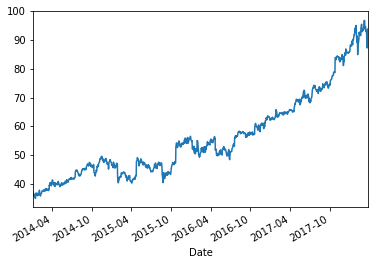

In [66]:
df['Close'].plot()
plt.show()

c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  import sys
c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  


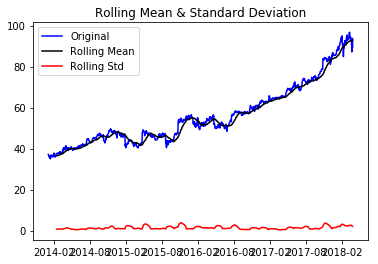

Results of Dickey-Fuller Test:
Test Statistic                    0.776084
p-value                           0.991240
#Lags Used                        9.000000
Number of Observations Used    1055.000000
Critical Value (1%)              -3.436564
Critical Value (5%)              -2.864283
Critical Value (10%)             -2.568231
dtype: float64


In [78]:
ts = df['Close']
ADF_Stationarity_Test(ts,30)

In [79]:
import numpy as np
ts_log = np.log(ts)

c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


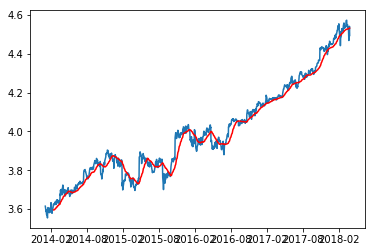

In [80]:
moving_avg = pd.rolling_mean(ts_log,30)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [82]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

Date
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
2014-01-08   NaN
Name: Close, dtype: float64

c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  import sys
c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  


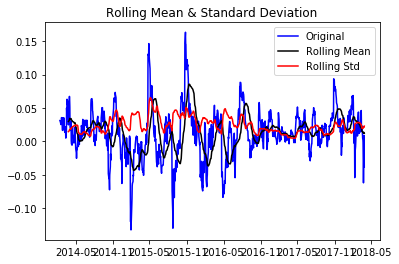

Results of Dickey-Fuller Test:
Test Statistic                -6.289903e+00
p-value                        3.620686e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.035000e+03
Critical Value (1%)           -3.436684e+00
Critical Value (5%)           -2.864337e+00
Critical Value (10%)          -2.568259e+00
dtype: float64


In [83]:
ts_log_moving_avg_diff.dropna(inplace=True)
ADF_Stationarity_Test(ts_log_moving_avg_diff,30)

<h2>Differencing</h2>

In [84]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  import sys
c:\users\mjbol\anaconda3\envs\pabase\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


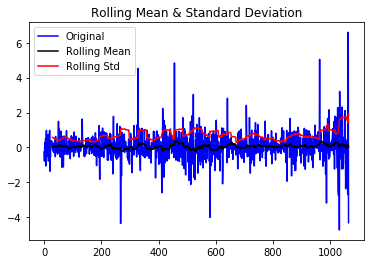

Results of Dickey-Fuller Test:
Test Statistic                -1.268052e+01
p-value                        1.189737e-23
#Lags Used                     8.000000e+00
Number of Observations Used    1.055000e+03
Critical Value (1%)           -3.436564e+00
Critical Value (5%)           -2.864283e+00
Critical Value (10%)          -2.568231e+00
dtype: float64


In [97]:
ts_diff = difference(ts,1)
ts_diff= np.array(ts_diff)
ADF_Stationarity_Test(ts_diff,30)

In [104]:
inverted = [inverse_difference(ts[i], ts_diff[i]) for i in range(len(ts_diff))]

In [106]:
df_new = pd.DataFrame(list(zip(ts,ts_diff,inverted))).head()
df_new.columns = ['Original','Differenced','Inverted']
df_new.head()

,Original,Differenced,Inverted
0,37.16,-0.25,36.91
1,36.91,-0.78,36.13
2,36.13,0.28,36.41
3,36.41,-0.65,35.76
4,35.76,-0.23,35.53


In [105]:
inverted

AttributeError: 'list' object has no attribute 'head'